In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv('../data/processed/updated_ds/dataset_with_terrain_new_train_2014_2021.csv')
df.head()

,latitude,longitude,datetime,loc_id,runtime,frame75_loc_id,elevation_m,slope_deg,since_prev_pr,pr_sum,...,hdw_score,t_range_mean_rt_50_59,nlcd_wui_intensity,dryness_score,dry_on_slope,wnd_slope,vpd_times_wind,erc_over_fm1000,erc_over_fm1000_slope,year
0,48.128431,-97.276685,2014-10-15,0,60,0,252.070267,0.521021,3,9.5,...,669.558074,14.16,9.0,0.41800,0.217787,2.240391,2.33060,1.961947,1.022216,2014
1,48.128431,-97.276685,2015-10-15,0,60,1,252.070267,0.521021,3,10.5,...,945.400828,14.54,9.0,1.03200,0.537694,2.537373,3.25316,2.287472,1.191822,2015
2,48.128431,-97.276685,2016-10-14,0,60,2,252.070267,0.521021,3,14.1,...,477.262604,9.16,9.0,-4.34450,-2.263577,2.724941,1.68406,1.018186,0.530496,2016
3,48.128431,-97.276685,2017-10-14,0,60,3,252.070267,0.521021,99,0.0,...,779.876144,14.54,9.0,-1.13575,-0.591750,2.355016,2.69844,1.561075,0.813353,2017
4,48.128431,-97.276685,2018-10-14,0,60,4,252.070267,0.521021,0,38.6,...,74.819270,6.13,9.0,-8.62850,-4.495631,2.130977,0.26994,0.434342,0.226301,2018


In [59]:
df.describe()

,latitude,longitude,loc_id,runtime,frame75_loc_id,elevation_m,slope_deg,since_prev_pr,pr_sum,pr_max,...,hdw_score,t_range_mean_rt_50_59,nlcd_wui_intensity,dryness_score,dry_on_slope,wnd_slope,vpd_times_wind,erc_over_fm1000,erc_over_fm1000_slope,year
count,106401.000000,106401.000000,106401.000000,106401.0,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,...,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000,106401.000000
mean,39.310681,-106.078465,13346.954765,60.0,61961.787173,811.708102,5.857683,26.841298,18.773267,10.186916,...,1230.833268,14.226319,6.971504,4.744708,34.748240,21.610990,4.112744,4.556725,29.428173,2017.099614
std,5.358370,14.461103,9226.050392,0.0,35989.476792,730.134587,7.255698,41.835789,30.374978,15.555885,...,843.983432,3.487702,3.263911,8.306388,92.896460,27.551986,2.714179,4.688422,59.572610,2.222089
min,25.260270,-124.437000,0.000000,60.0,0.000000,-65.794853,0.000000,0.000000,0.000000,0.000000,...,8.425361,1.750000,0.000000,-17.142000,-491.172384,0.000000,0.032900,0.000000,0.000000,2014.000000
25%,34.817790,-118.181000,5636.000000,60.0,30884.000000,215.000000,1.000000,1.000000,0.000000,0.000000,...,642.793800,11.770000,4.000000,-1.885500,-2.004750,3.948656,2.217490,1.435305,2.034833,2015.000000
50%,38.826360,-110.109025,11883.000000,60.0,61677.000000,562.341187,3.000000,3.000000,7.100000,4.500000,...,1027.200040,14.170000,8.000000,3.382500,4.274932,10.865961,3.474630,2.755486,7.862833,2017.000000
75%,43.978000,-95.373000,19714.000000,60.0,92722.000000,1313.000000,7.882875,99.000000,25.000000,13.700000,...,1597.517049,16.620000,9.000000,11.065250,39.652022,28.355027,5.323320,6.118082,28.521633,2019.000000
max,48.998730,-67.012500,37097.000000,60.0,126514.000000,3640.668701,59.164391,99.000000,1013.300000,528.000000,...,8265.874176,28.340000,12.000000,29.294500,1518.445477,370.164938,26.686000,50.942569,2239.361323,2021.000000


In [60]:
df_org = pd.read_csv('../data/interim/wildfire_dataset_no_dups_no_nan.csv')

Correlation

In [61]:
# Before Feature Engineering
# Columns to exclude
id_cols = ['loc_id', 'runtime', 'frame75_loc_id', 'gap_before_finish','dup_or_backwards']
target_col = ['Wildfire']
time = ['datetime']
exclude_cols = set(id_cols + target_col + time)

# Build final list of continuous variables
continuous_cols = [
    col for col in df_org.columns
    if col not in exclude_cols
]

# Ensure we only keep numeric dtypes
continuous_cols = [
    col for col in continuous_cols
    if pd.api.types.is_numeric_dtype(df_org[col])
]


In [62]:
df_org[continuous_cols]

,latitude,longitude,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,48.128431,-97.276685,0.0,68.8,30.0,0.00304,163.9,274.7,284.8,5.7,43.0,15.0,17.1,34.0,4.2,2.7,0.55
1,48.128431,-97.276685,0.0,69.5,26.9,0.00301,160.8,274.4,286.0,6.4,49.0,13.4,16.8,37.0,4.7,3.0,0.60
2,48.128431,-97.276685,0.0,87.2,30.9,0.00311,161.0,271.5,284.8,5.8,45.0,13.6,16.8,36.0,3.7,2.4,0.47
3,48.128431,-97.276685,0.0,92.9,32.5,0.00301,118.8,270.2,283.7,4.8,40.0,14.3,16.8,35.0,3.0,2.0,0.41
4,48.128431,-97.276685,0.0,100.0,34.7,0.00318,120.4,269.1,283.7,3.3,32.0,15.6,16.8,33.0,2.3,1.6,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385049,41.078600,-123.687000,0.0,75.1,21.7,0.00775,312.2,286.1,306.8,3.9,62.0,9.3,7.9,72.0,10.2,7.3,2.14
1385050,41.078600,-123.687000,0.0,62.8,17.6,0.00724,308.1,287.8,308.8,3.2,59.0,8.6,7.9,74.0,10.2,7.3,2.60
1385051,41.078600,-123.687000,0.0,57.4,19.1,0.00699,313.7,288.6,306.9,3.7,63.0,8.0,7.9,75.0,10.4,7.4,2.40
1385052,41.078600,-123.687000,0.0,63.6,24.7,0.00807,300.4,289.3,305.5,4.9,70.0,7.9,8.0,74.0,10.8,7.6,2.07


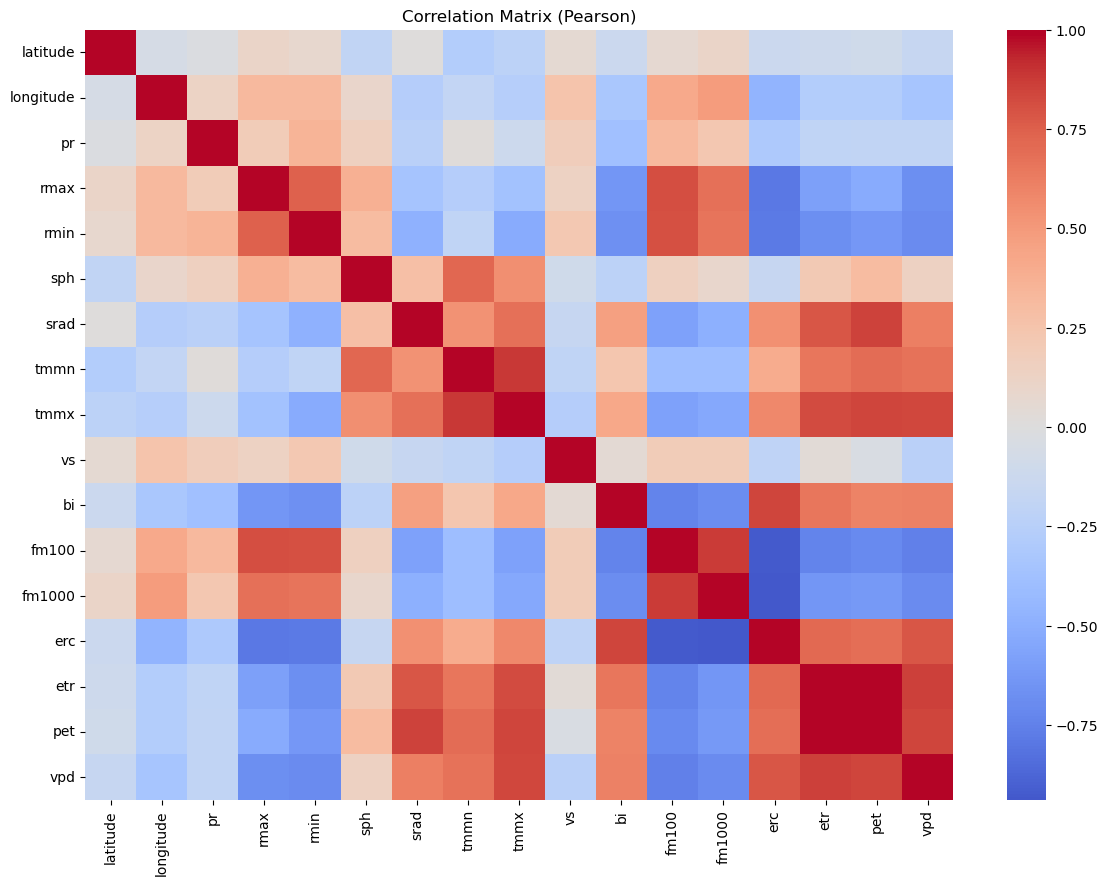

[('erc', 'fm100', np.float64(-0.9303348264273336)),
 ('erc', 'fm1000', np.float64(-0.9387025363878572)),
 ('etr', 'pet', np.float64(0.9874678816099434))]

In [63]:
# Compute correlation matrix
corr = df_org[continuous_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Matrix (Pearson)")
plt.show()

# List highly correlated pairs > 0.9
high_corr = []
for i in corr.columns:
    for j in corr.columns:
        if i < j and abs(corr.loc[i,j]) > 0.90:
            high_corr.append((i, j, corr.loc[i,j]))

high_corr

In [64]:
# After Feature Engineering
# Columns to exclude
id_cols = ['loc_id', 'runtime', 'frame75_loc_id']
target_col = ['Wildfire_bin']
time_categorical = ['doy', 'month', 'season', 'weekday_weekend', 'year']

nlcd_cols = [
    'nlcd_canopy_height_class', 'nlcd_flammability', 'nlcd_human_presence',
    'nlcd_fuel_regime_class', 'nlcd_water_ice_barren', 'nlcd_wetland',
    'nlcd_forest', 'nlcd_shrub', 'nlcd_grass_pasture', 'nlcd_crops',
    'nlcd_developed'
]

# Keep continuous time encodings
time_continuous = ['doy_sin', 'doy_cos', 'weekday_sin', 'weekday_cos']

# Build final list of continuous variables
exclude_cols = set(id_cols + target_col + time_categorical + nlcd_cols)

continuous_cols = [
    col for col in df.columns
    if col not in exclude_cols
]

# Ensure we only keep numeric dtypes
continuous_cols = [
    col for col in continuous_cols
    if pd.api.types.is_numeric_dtype(df[col])
]


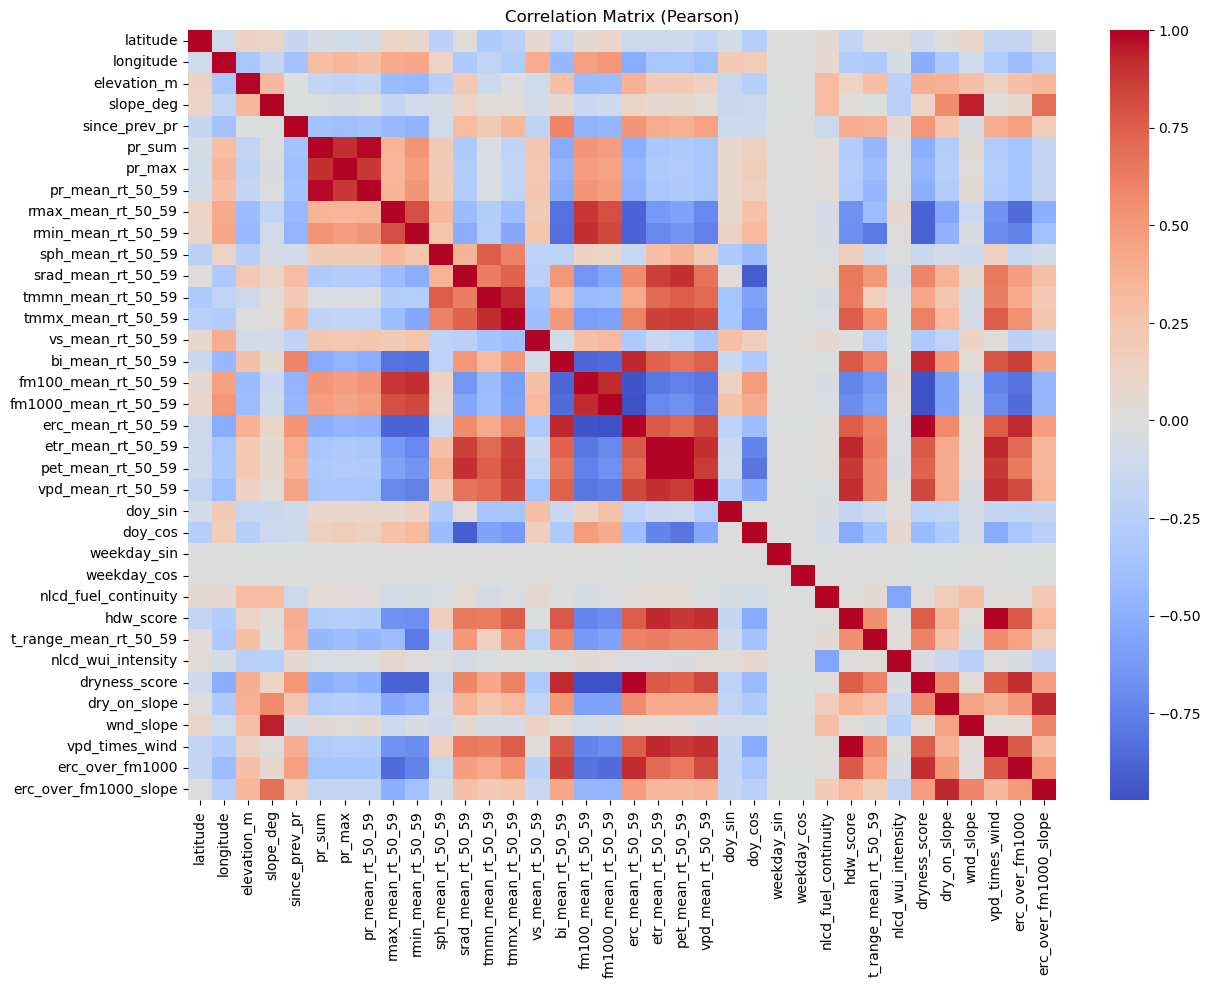

[('slope_deg', 'wnd_slope', np.float64(0.9423962345959601)),
 ('pr_max', 'pr_sum', np.float64(0.906158524690793)),
 ('pr_mean_rt_50_59', 'pr_sum', np.float64(0.9797972528616585)),
 ('tmmn_mean_rt_50_59', 'tmmx_mean_rt_50_59', np.float64(0.9221087046950125)),
 ('bi_mean_rt_50_59', 'erc_mean_rt_50_59', np.float64(0.9303546141441106)),
 ('bi_mean_rt_50_59', 'dryness_score', np.float64(0.9199386744483349)),
 ('fm100_mean_rt_50_59', 'rmin_mean_rt_50_59', np.float64(0.9104365983570932)),
 ('fm1000_mean_rt_50_59',
  'fm100_mean_rt_50_59',
  np.float64(0.9155703399491688)),
 ('erc_mean_rt_50_59', 'fm100_mean_rt_50_59', np.float64(-0.9526267035371787)),
 ('erc_mean_rt_50_59', 'fm1000_mean_rt_50_59', np.float64(-0.96517930508208)),
 ('erc_mean_rt_50_59', 'erc_over_fm1000', np.float64(0.9163932820626154)),
 ('etr_mean_rt_50_59', 'pet_mean_rt_50_59', np.float64(0.9899214417259584)),
 ('etr_mean_rt_50_59', 'vpd_mean_rt_50_59', np.float64(0.9003102446073051)),
 ('etr_mean_rt_50_59', 'hdw_score', np.

In [65]:
# Compute correlation matrix
corr = df[continuous_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False, center=0)
plt.title("Correlation Matrix (Pearson)")
plt.show()

# List highly correlated pairs > 0.9
high_corr = []
for i in corr.columns:
    for j in corr.columns:
        if i < j and abs(corr.loc[i,j]) > 0.90:
            high_corr.append((i, j, corr.loc[i,j]))

high_corr


| Feature 1                 | Feature 2                   | Correlation |
|---------------------------|-----------------------------|-------------|
| slope_deg                 | wnd_slope                   | 0.942       |
| pr_max                    | pr_sum                      | 0.906       |
| pr_mean_rt_50_59          | pr_sum                      | 0.980       |
| tmmn_mean_rt_50_59        | tmmx_mean_rt_50_59          | 0.922       |
| bi_mean_rt_50_59          | erc_mean_rt_50_59           | 0.930       |
| bi_mean_rt_50_59          | dryness_score               | 0.920       |
| fm100_mean_rt_50_59       | rmin_mean_rt_50_59          | 0.910       |
| fm1000_mean_rt_50_59      | fm100_mean_rt_50_59         | 0.916       |
| erc_mean_rt_50_59         | fm100_mean_rt_50_59         | -0.953      |
| erc_mean_rt_50_59         | fm1000_mean_rt_50_59        | -0.965      |
| erc_mean_rt_50_59         | erc_over_fm1000             | 0.916       |
| etr_mean_rt_50_59         | pet_mean_rt_50_59           | 0.990       |
| etr_mean_rt_50_59         | vpd_mean_rt_50_59           | 0.900       |
| etr_mean_rt_50_59         | hdw_score                   | 0.930       |
| etr_mean_rt_50_59         | vpd_times_wind              | 0.930       |
| pet_mean_rt_50_59         | srad_mean_rt_50_59          | 0.907       |
| vpd_mean_rt_50_59         | vpd_times_wind              | 0.903       |
| doy_cos                   | srad_mean_rt_50_59          | -0.912      |
| hdw_score                 | vpd_mean_rt_50_59           | 0.909       |
| hdw_score                 | vpd_times_wind              | 1.000       |
| dryness_score             | fm100_mean_rt_50_59         | -0.963      |
| dryness_score             | fm1000_mean_rt_50_59        | -0.973      |
| dryness_score             | erc_mean_rt_50_59           | 0.998       |
| dryness_score             | erc_over_fm1000             | 0.902       |
| dry_on_slope              | erc_over_fm1000_slope       | 0.924       |


Outliers

In [66]:
# IQR outlier detection on continuous features
def iqr_outliers_series(s):
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (s < lower) | (s > upper)
    return mask, lower, upper

iqr_summary = []

for col in continuous_cols:
    mask, lower, upper = iqr_outliers_series(df[col])
    n_out = mask.sum()
    frac_out = n_out / len(df)
    iqr_summary.append({
        "feature": col,
        "n_outliers": int(n_out),
        "frac_outliers": frac_out,
        "lower_bound": lower,
        "upper_bound": upper
    })

iqr_summary_df = pd.DataFrame(iqr_summary).sort_values("frac_outliers", ascending=False)
iqr_summary_df


,feature,n_outliers,frac_outliers,lower_bound,upper_bound
31,dry_on_slope,16628,0.156277,-64.489907,102.137179
35,erc_over_fm1000_slope,12988,0.122067,-37.695367,68.251832
32,wnd_slope,8850,0.083176,-32.660900,64.964583
3,slope_deg,8611,0.080930,-9.324313,18.207189
7,pr_mean_rt_50_59,8037,0.075535,-3.360000,5.600000
5,pr_sum,7649,0.071888,-37.500000,62.500000
6,pr_max,7211,0.067772,-20.550000,34.250000
34,erc_over_fm1000,6493,0.061024,-5.588860,13.142247
27,hdw_score,4298,0.040394,-789.291073,3029.601922
10,sph_mean_rt_50_59,4161,0.039107,-0.001264,0.012704


In [67]:
# Compute per-feature outlier masks
outlier_masks = []

for col in continuous_cols:
    mask, lower, upper = iqr_outliers_series(df[col])
    outlier_masks.append(mask)

# Combine into a single mask: row has outlier in ANY feature
combined_outlier_mask = pd.concat(outlier_masks, axis=1).any(axis=1)

# Label distribution among outlier rows
label_counts_outliers = df.loc[combined_outlier_mask, "Wildfire_bin"].value_counts(normalize=True)
label_counts_no_outliers = df.loc[~combined_outlier_mask, "Wildfire_bin"].value_counts(normalize=True)

label_counts_outliers, label_counts_no_outliers


(Wildfire_bin
 0    0.813451
 1    0.186549
 Name: proportion, dtype: float64,
 Wildfire_bin
 0    0.788007
 1    0.211993
 Name: proportion, dtype: float64)

In [68]:
# MAD outlier detection on continuous features
def mad_outliers_series(s, k=3):
    median = s.median()
    mad = np.median(np.abs(s - median))
    lower = median - k * mad
    upper = median + k * mad
    mask = (s < lower) | (s > upper)
    return mask, lower, upper

mad_summary = []

for col in continuous_cols:
    mask, lower, upper = mad_outliers_series(df[col])
    n_out = mask.sum()
    frac_out = n_out / len(df)
    mad_summary.append({
        "feature": col,
        "n_outliers": int(n_out),
        "frac_outliers": frac_out,
        "lower_bound": lower,
        "upper_bound": upper
    })

mad_summary_df = pd.DataFrame(mad_summary).sort_values("frac_outliers", ascending=False)
mad_summary_df


,feature,n_outliers,frac_outliers,lower_bound,upper_bound
26,nlcd_fuel_continuity,47879,0.449986,3.000000,3.000000
31,dry_on_slope,30408,0.285787,-36.229407,44.779270
4,since_prev_pr,26697,0.250909,-6.000000,12.000000
35,erc_over_fm1000_slope,25813,0.242601,-14.117609,29.843276
7,pr_mean_rt_50_59,25354,0.238287,-1.180000,2.360000
5,pr_sum,23526,0.221107,-14.200000,28.400000
3,slope_deg,21269,0.199895,-3.852271,9.852271
32,wnd_slope,20751,0.195026,-14.802938,36.534861
6,pr_max,19684,0.184998,-9.000000,18.000000
34,erc_over_fm1000,19511,0.183372,-2.233370,7.744342


In [69]:
# Heuristic ranges for continuous features, except engineered features made from dividing two original features. The original features are already checked using valid ranges, so the engineered features are likely to be within valid ranges, too.
valid_ranges = {
    "latitude": (25, 50),
    "longitude": (-125, -65),
    "elevation_m": (0, 4500),
    "slope_deg": (0, 90),

    "since_prev_pr": (0, 1000),
    "pr_sum": (0, 500),
    "pr_max": (0, 200),
    "pr_mean_rt_50_59": (0, 100),

    "rmax_mean_rt_50_59": (0, 100),
    "rmin_mean_rt_50_59": (0, 100),
    "sph_mean_rt_50_59": (0, 0.05),

    "srad_mean_rt_50_59": (0, 500),
    "etr_mean_rt_50_59": (0, 20),

    # Kelvin-corrected temperature ranges
    "tmmn_mean_rt_50_59": (230, 320),   # min temp: -43°C to +47°C
    "tmmx_mean_rt_50_59": (240, 330),   # max temp: -33°C to +57°C

    "vpd_mean_rt_50_59": (0, 10),
    "bi_mean_rt_50_59": (0, 500),
    "erc_mean_rt_50_59": (0, 100),

    "vs_mean_rt_50_59": (0, 50),

    "fm1000_mean_rt_50_59": (0, 100),

    # cyclical features (bounded by trig)
    "doy_sin": (-1, 1),
    "doy_cos": (-1, 1),
}


In [70]:
# Start with no invalid rows
invalid_mask = pd.Series(False, index=df.index)

for col, (low, high) in valid_ranges.items():
    mask = (df[col] < low) | (df[col] > high)
    invalid_mask |= mask

# All rows that violate at least one physical constraint
invalid_df = df[invalid_mask].copy()

# Clean training data
df_phys_clean = df[~invalid_mask].copy()
invalid_summary = []

for col, (low, high) in valid_ranges.items():
    mask = (df[col] < low) | (df[col] > high)
    count = mask.sum()
    if count > 0:
        invalid_summary.append({
            "feature": col,
            "count_invalid": int(count),
            "min_value": float(df[col].min()),
            "max_value": float(df[col].max()),
            "valid_min": low,
            "valid_max": high,
        })

invalid_summary_df = pd.DataFrame(invalid_summary)
invalid_summary_df


,feature,count_invalid,min_value,max_value,valid_min,valid_max
0,elevation_m,233,-65.794853,3640.668701,0,4500
1,pr_sum,9,0.000000,1013.300000,0,500
2,pr_max,18,0.000000,528.000000,0,200
3,pr_mean_rt_50_59,1,0.000000,100.340000,0,100
4,erc_mean_rt_50_59,974,0.000000,117.000000,0,100


We decide to remove some of highly correlated features. For outliers, we decide to keep all entries, almost all of them are within or slightly higher than the heuristic bounds. For elevation_m, the negative values may be due to the process of extra features addtion from external dataset

In [71]:
# Original Dataset with allf features:
df.columns

Index(['latitude', 'longitude', 'datetime', 'loc_id', 'runtime',
       'frame75_loc_id', 'elevation_m', 'slope_deg', 'since_prev_pr', 'pr_sum',
       'pr_max', 'Wildfire_bin', 'pr_mean_rt_50_59', 'rmax_mean_rt_50_59',
       'rmin_mean_rt_50_59', 'sph_mean_rt_50_59', 'srad_mean_rt_50_59',
       'tmmn_mean_rt_50_59', 'tmmx_mean_rt_50_59', 'vs_mean_rt_50_59',
       'bi_mean_rt_50_59', 'fm100_mean_rt_50_59', 'fm1000_mean_rt_50_59',
       'erc_mean_rt_50_59', 'etr_mean_rt_50_59', 'pet_mean_rt_50_59',
       'vpd_mean_rt_50_59', 'doy', 'doy_sin', 'doy_cos', 'weekday_weekend',
       'month', 'season', 'weekday_sin', 'weekday_cos', 'nlcd_fuel_continuity',
       'nlcd_canopy_height_class', 'nlcd_flammability', 'nlcd_human_presence',
       'nlcd_fuel_regime_class', 'nlcd_water_ice_barren', 'nlcd_wetland',
       'nlcd_forest', 'nlcd_shrub', 'nlcd_grass_pasture', 'nlcd_crops',
       'nlcd_developed', 'hdw_score', 't_range_mean_rt_50_59',
       'nlcd_wui_intensity', 'dryness_score', 'dr

In [ ]:
# Dropped features after adding numerous engineered features and checking correlations and outliers. Final list:

DROP_COLS = [
    # IDs / technical
    "runtime",
    "frame75_loc_id",
    "loc_id",
    "datetime",

    # redundant calendar fields
    "doy",
    "year",      # optional; try both with and without
    "month",
    "season",
    "date",

    # removing features:
    "weekday_sin","weekday_cos", "hdw_score", "weekday_weekend",

    #removing other feature step 2
    "vpd_times_wind", "wnd_slope", "dry_on_slope",

    #removing features 3:
    "dryness_score", "nlcd_wui_intensity",

    #removing features 4:
    "fm100_mean_rt_50_59", "t_range_mean_rt_50_59",

    #removing other feratures
    "pr_mean_rt_50_59", "pet_mean_rt_50_59", "Fire50km_past_count"
]

In [ ]:
# Final features ready for traning, along with target
final_features = [
    'latitude', 'longitude', 'elevation_m', 'slope_deg',

    'pr_max', 'pr_sum', 'since_prev_pr',

    'rmax_mean_rt_50_59', 'rmin_mean_rt_50_59', 
    'sph_mean_rt_50_59',
    'srad_mean_rt_50_59', 
    'etr_mean_rt_50_59',
    'tmmn_mean_rt_50_59', 'tmmx_mean_rt_50_59',
    'vs_mean_rt_50_59', 
    'vpd_mean_rt_50_59',

    'bi_mean_rt_50_59', 'fm1000_mean_rt_50_59', 'erc_mean_rt_50_59',

    'erc_over_fm1000', 'erc_over_fm1000_slope',

    'doy_sin', 'doy_cos',

    'nlcd_fuel_continuity', 'nlcd_canopy_height_class', 'nlcd_flammability',
    'nlcd_human_presence', 'nlcd_fuel_regime_class',
    'nlcd_water_ice_barren', 'nlcd_wetland', 'nlcd_forest',
    'nlcd_shrub', 'nlcd_grass_pasture', 'nlcd_crops', 'nlcd_developed'
]
target = 'wildfire_bin'
